In [1]:
###########################
# LOADING EVDEV LIBRARIES #
###########################
import asyncio
import evdev
from evdev import list_devices, InputDevice, InputEvent, categorize, ecodes, UInput
import evdev

import pyautogui

##################################
# LOADING              LIBRARIES #
##################################


import threading
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import mss
import sched, time
import cv2
import pickle
from multiprocessing import Process, Manager
from multiprocessing.managers import BaseManager
import subprocess
import os, sys

##################################
# LOADING DEEPLEARNING LIBRARIES #
##################################
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

##################################
# LOADING FUNCTIONS & CLASSES    #
##################################


class CircularQueue(object):
    #Constructor
    def __init__(self,maxSize=3):
        self.queue = list()
        self.head = 0
        self.maxSize = maxSize
    #Adding elements to the queue
    def enqueue(self,data):
        if len(self.queue) >= self.maxSize:
            self.queue.pop(0)
            self.queue.append(data)
        else:
            self.queue.append(data)
        return True
    def return_queue(self):
        return self.queue

def save_to_file(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as output:
        pickle.dump(objeto, output, pickle.HIGHEST_PROTOCOL)


def load_file(nome_arquivo):
    with open(nome_arquivo, 'rb') as input:
        objeto = pickle.load(input)
    return objeto

In [2]:
##################################
#           SCORE MODEL          #
##################################

#generate score model
def generate_scoring_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Lambda(lambda x: x/255,input_shape=(9, 8, 1)))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    model.load_weights('../OCR_POINTS_MODEL_OUTRUN/'+'model_score_outrun.h5')
    
    return model

def return_score(image,model):
    limit_numbers_1 = np.arange(200,136,-8)
    limit_numbers_2 = np.arange(192,128,-8)
    
    score = 0
    
    for j in range(len(limit_numbers_1)):
        
        i = model.predict(np.expand_dims(np.expand_dims(image[15:24,limit_numbers_2[j]:limit_numbers_1[j]],axis=-1),axis=0))[0]
        
        score = score + i.argmax()*(10**j)
    
    return score


In [3]:
def model_capture_return_images(images): 
    
    # predict command
    imgs = np.array(images).astype(np.uint8)
    #imgs = np.expand_dims(imgs, axis=0)
    imgs = np.swapaxes(imgs,0,1)
    imgs = np.swapaxes(imgs,1,2)
    #print('model_capture_return_images shape',imgs.shape)
    return imgs

In [4]:
score_model = generate_scoring_model()

Tempo de Resposta por quadro

In [5]:
action_analysis = load_file('fila_action_time_517.pkl')

In [6]:
time = []
for i in range(1,len(action_analysis)):
    
    time.append(action_analysis[i][1]-action_analysis[i-1][1])

In [7]:
time = np.array(time)[np.array(time) < 1]

In [8]:
np.mean(time), np.std(time), np.max(time), np.min(time)

(0.32897753044239525,
 0.23068447663749142,
 0.9806034564971924,
 0.007997989654541016)

End

In [20]:
queue = load_file('fila_treino_segundo_132_0_.pkl')

In [21]:
len(queue)

2357

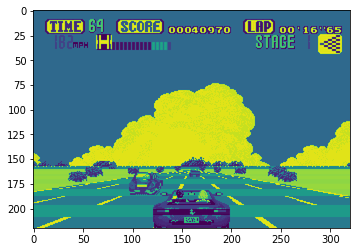

In [19]:
plt.imshow(queue[2000][0])

In [13]:
time = []
for i in range(1,len(queue)):
    
    time.append(queue[i][2]-queue[i-1][2])

In [14]:
np.mean(time), np.std(time), np.max(time), np.min(time)

(0.20613774214035424,
 0.12698536474525599,
 7.148967504501343,
 0.005369663238525391)

In [24]:
actions = []
for i in range(0,len(queue)):
    
    actions.append(queue[i][1])

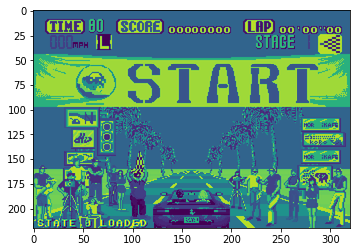

In [9]:
plt.imshow(queue[200][0])

In [21]:
action = queue[500][1].copy()

In [22]:
action

array([ 1.0750692e-02,  5.9139177e-02,  1.0640736e-03,  4.4016022e-02,
        1.9456639e-03, -1.4172223e-03,  1.0530662e-02,  1.1375464e-02,
        4.6971595e-01,  7.0837196e-03,  1.8503267e-01,  1.5339514e-04,
        1.7358154e-01, -7.7743997e-04], dtype=float32)

In [17]:
np.clip(10,-1.5,1.5)

1.5

In [23]:
score = -0.1

for i,j in enumerate(action):
    if i == action.argmax():
        action[i] = np.clip(action[i] + score,-1,1)
    else:
        action[i] = np.clip(action[i] + (-1)*score,-1,1)

In [24]:
action

array([0.11075069, 0.15913917, 0.10106407, 0.14401603, 0.10194566,
       0.09858277, 0.11053066, 0.11137547, 0.36971596, 0.10708372,
       0.28503266, 0.10015339, 0.27358153, 0.09922256], dtype=float32)